In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


df = pd.read_csv(r"C:\Users\susha\OneDrive\Desktop\Programing Folder\Other's Code\Simran's Code\Bharat Intern\Data Analysis\Stock Market Prdiction\Bitcoin Price Prediction.csv ")


C:\Users\susha\AppData\Local\Temp\ipykernel_10480\2026616913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close'] = scaler.fit_transform(data[['close']])


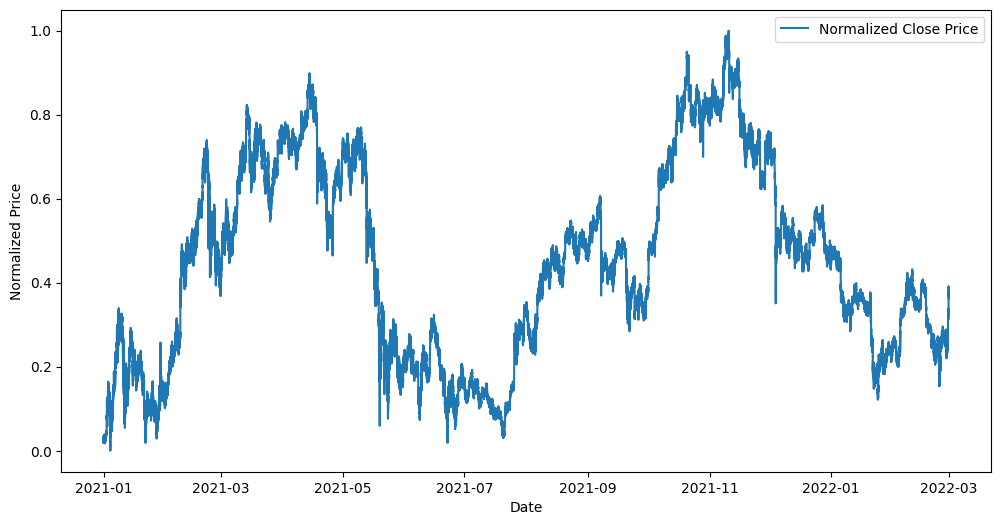

In [2]:

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

df.sort_values('date', ascending=True, inplace=True)

data = df[['date', 'close']]

data.set_index('date', inplace=True)

scaler = MinMaxScaler()
data['close'] = scaler.fit_transform(data[['close']])

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Normalized Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


In [10]:

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10

X, y = create_sequences(data['close'].values, sequence_length)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [11]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


Epoch 1/50
15270/15270 [==============================] - 92s 6ms/step - loss: 2.2010e-04
Epoch 2/50
15270/15270 [==============================] - 85s 6ms/step - loss: 4.8283e-06
Epoch 3/50
15270/15270 [==============================] - 85s 6ms/step - loss: 3.6717e-06
Epoch 4/50
15270/15270 [==============================] - 85s 6ms/step - loss: 3.2372e-06
Epoch 5/50
15270/15270 [==============================] - 96s 6ms/step - loss: 3.0666e-06
Epoch 6/50
15270/15270 [==============================] - 89s 6ms/step - loss: 3.0310e-06
Epoch 7/50
15270/15270 [==============================] - 85s 6ms/step - loss: 2.9623e-06
Epoch 8/50
15270/15270 [==============================] - 87s 6ms/step - loss: 2.9415e-06
Epoch 9/50
15270/15270 [==============================] - 86s 6ms/step - loss: 2.8822e-06
Epoch 10/50
15270/15270 [==============================] - 87s 6ms/step - loss: 2.8344e-06
Epoch 11/50
15270/15270 [==============================] - 88s 6ms/step - loss: 2.8244e-06
Epoch 12

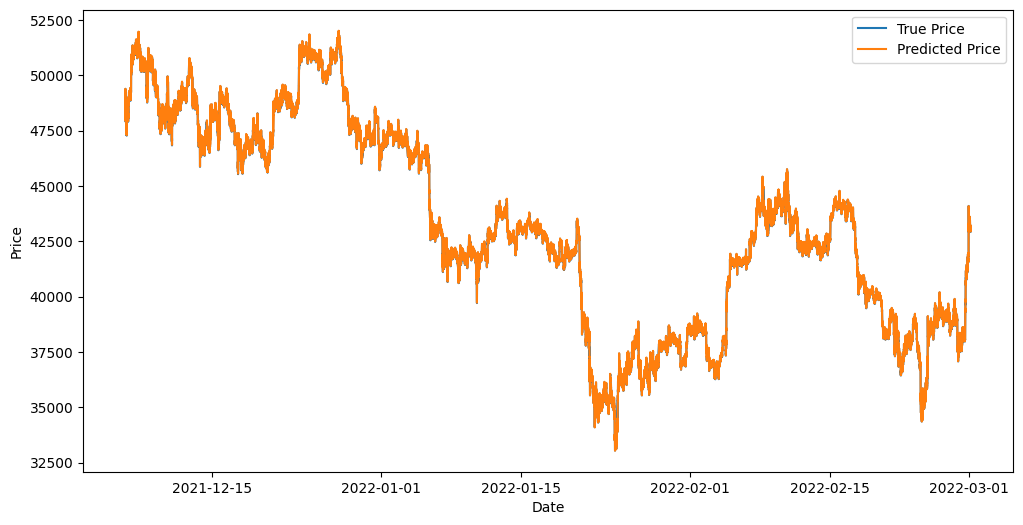

In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
 
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_true, label='True Price')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
